# Imports

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors
from IPython.display import display, clear_output

from datetime import datetime
import tclab
import time

import os

import package_LAB
from importlib import reload
package_LAB = reload(package_LAB)
from package_LAB import SelectPath_RT, Delay_RT, LEAD_LAG_RT, PID_RT, myRound, IMC_TUNING
from package_DBR import FOPDT, SOPDT, FO_RT

# TClab function

In [9]:
def run(SP, MV, DV, PV, Ts, FF, Man, MVI, MVP, MVD):
    # global i, t, MV, PV, DV, SP

    
    #sets MV and DV
    lab.Q1(MV[-1])
    lab.Q2(DV[-1])
    
    #appends the value of PV
    PV.append(lab.T1)
    
    #sleeps to let the TClab heat
    time.sleep(Ts)
    
    #prepares the data to draw these values
    l1.set_data(t, MV)
    l2.set_data(t, PV)
    l3.set_data(t, DV)
    l4.set_data(t, SP)
    
    clear_output(wait=True)
    
    # Remove if increasing x-axis length is not desired
    ax1.set_xlim(0, t[-1]+1)
    ax2.set_xlim(0, t[-1]+1)
    ax3.set_xlim(0, t[-1]+1)
    
    #auto adjusts y axis
    if i > 1:
        ax1.set_ylim(myRound(np.min(MV), 5) - 5, myRound(np.max(MV), 5) + 5)
        ax2.set_ylim(myRound(min(np.min(PV), np.min(SP)), 5) - 5, myRound(max(np.max(PV), np.max(SP)), 5) + 5)
        ax3.set_ylim(myRound(np.min(DV), 5) - 5, myRound(np.max(DV), 5) + 5)        
    
    #prints the picture with the graphs
    display(fig)
    
    #takes the current time and makes it a string
    now = datetime.now()
    date_time = now.strftime("%Y-%m-%d-%Hh%M")
    
    #transforms these vectors into numpy arrays
    t_a = np.array(t)
    MV_a = np.array(MV)
    PV_a = np.array(PV)
    DV_a = np.array(DV)
    SP_a = np.array(SP)
    MVI_a = np.array(MVI)
    MVP_a = np.array(MVP)
    MVD_a = np.array(MVD)
    Man_a = np.array(Man)
    
    #stacks arrays vertically and then transposes them
    my_data = np.vstack((t_a.T, MV_a.T, MVP_a.T, MVI_a.T, MVD_a.T, SP_a.T, PV_a.T, DV_a.T, Man_a.T))
    my_data = my_data.T
    
    #Create path to store data into
    if (FF):
        if(Man):
            nameFile = 'Data/TCLab OLP + FF ' + date_time + '.txt'
        else:
            nameFile = 'Data/TCLab CLP + FF ' + date_time + '.txt'
    else:
        if(Man):
            nameFile = 'Data/TCLab OLP + no FF ' + date_time + '.txt'
        else:
            nameFile = 'Data/TCLab CLP + no FF ' + date_time + '.txt'
    
    #creates directory if it doesn't exist
    if not os.path.exists('Data'):
        os.makedirs('Data')
    #saves the file
    np.savetxt(nameFile,my_data,delimiter=',',header='t,MV,MVP,MVI,MVD,SP,PV,DV,Man',comments='')

# Parameters

In [10]:
TSim = 1500
Ts = 1
N = int(TSim / Ts) + 1

DV0 = 50
MV0 = 50
PV0 = 70


# P(s) = MV -> PV
Kp_p = 0.5438749526909622
T1_p = 184.2423025000344
T2_p = 6.478747375951926e-5
theta_p = 2.9999487500471216

# D(s) = DV -> PV
Kp_d = 0.3939794530691328
T1_d = 225.6571654918062
T2_d = 8.129086232603086
theta_d = 1.1226868296407733

# PID parameters
Kc = 0
Ti = 0
Td = 0
gamma = 0.2
alpha = 0.1
Kc, Ti, Td = IMC_TUNING(Kc, Ti, Td, gamma, Kp_p, T1_p, T2_p, theta_p, method='FOPD-PID')

#bounds on MV
MVMin = 0
MVMax = 100
offset_WP = PV0 - Kp_p * MV0

# Simulation vectors

In [11]:
t = []
SP = []
DV = []
PV = []
E = []
MV = []
MVP = []
MVI = []
MVD = []
Man = []
MVMan = []

MVFFDel = []
MVFFLL1 = []
MVFF = []

MVDel_p = []
PV_p1 = []
PV_p2 = []

DVDel_d = []
PV_d1 = []
PV_d2 = []

DV0_vec = []

# Paths

In [12]:
ManPath = {0: False, 2000: False, TSim: False}
MVManPath = {0: MV0, TSim: MV0}
SPPath = {0: PV0, 750: PV0 + 10, TSim: PV0}
DVPath = {0: DV0, 1000: DV0, TSim: DV0}

FF = False
ManFF = False

# Simulation

TCLab version 0.4.9
--- Serial Ports ---
COM6 Standard Serial over Bluetooth link (COM6) BTHENUM\{00001101-0000-1000-8000-00805F9B34FB}_LOCALMFG&0000\9&319A0FA&0&000000000000_0000001D
COM3 Standard Serial over Bluetooth link (COM3) BTHENUM\{00001101-0000-1000-8000-00805F9B34FB}_LOCALMFG&0000\9&319A0FA&0&000000000000_0000001F
COM14 Standard Serial over Bluetooth link (COM14) BTHENUM\{00001101-0000-1000-8000-00805F9B34FB}_LOCALMFG&0000\9&319A0FA&0&000000000000_00000020
COM5 Standard Serial over Bluetooth link (COM5) BTHENUM\{00001101-0000-1000-8000-00805F9B34FB}_VID&0001000A_PID&FFFF\9&319A0FA&0&88C6267AF2FF_C00000000
COM4 Standard Serial over Bluetooth link (COM4) BTHENUM\{00001101-0000-1000-8000-00805F9B34FB}_VID&000102B0_PID&0000\9&319A0FA&0&B04502CD3CB3_C00000000
COM15 Standard Serial over Bluetooth link (COM15) BTHENUM\{00001101-0000-1000-8000-00805F9B34FB}_VID&0001000A_PID&FFFF\9&319A0FA&0&88C626EE4EC0_C00000000


RuntimeError: No Arduino device found.

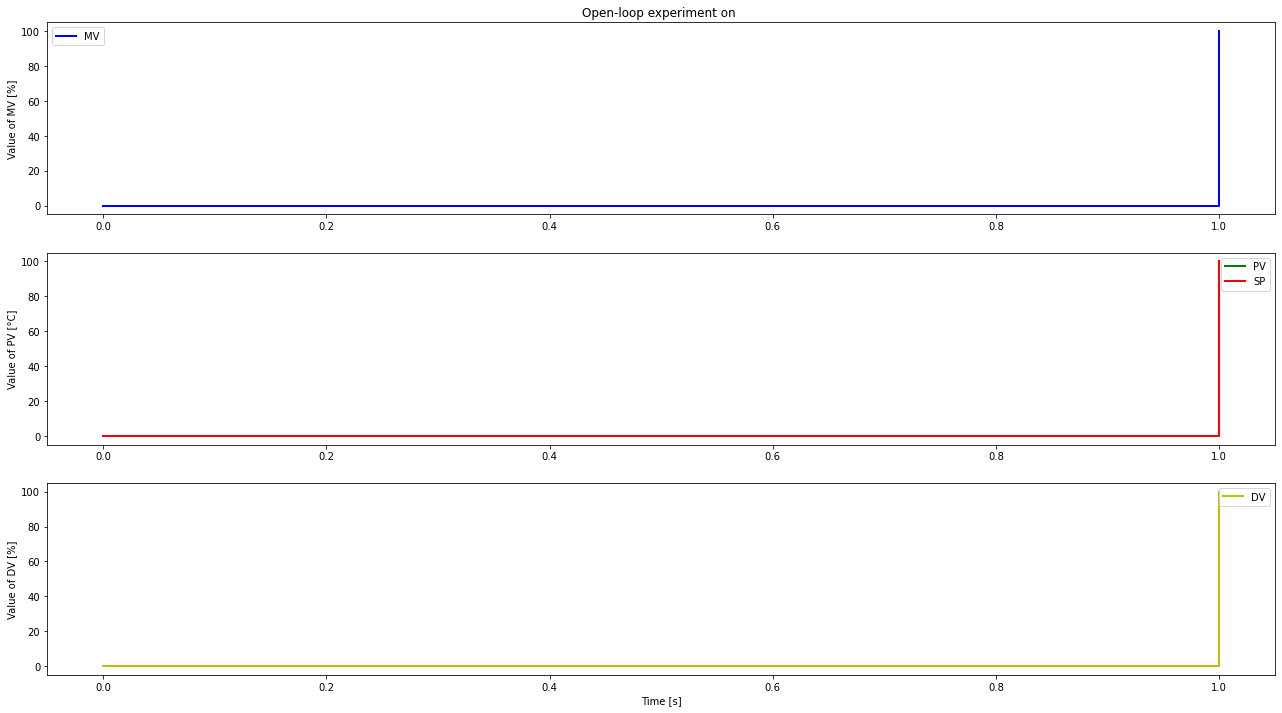

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_figheight(12)
fig.set_figwidth(22)

l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='MV',where='post')
ax1.set_ylabel('Value of MV [%]')
ax1.set_title('Open-loop experiment on ')
ax1.legend(loc='best')

l2, = ax2.step([0,1],[0,100],'g-',linewidth=2,label='PV',where='post')
l4, = ax2.step([0,1],[0,100],'r-',linewidth=2,label='SP',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')

l3, = ax3.step([0,1],[0,100],'y-',linewidth=2,label='DV',where='post')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Value of DV [%]')
ax3.legend(loc='best') 

lab = tclab.TCLab()

for i in range(0, N):
    t.append(i * Ts)
    
    #create SP
    SelectPath_RT(SPPath, t, SP)
    #create DV
    SelectPath_RT(DVPath, t, DV)
    
    #calculate the DV vector - the working point of DV
    for i in range(len(DV)):
        DV0_vec.append(DV[i] - DV0)
    
    #feedforward
    if (FF):
        Delay_RT(DV0_vec, np.max([theta_d - theta_p, 0]), Ts, MVFFDel)
        LEAD_LAG_RT(MVFFDel, - Kp_d / Kp_p, T1_p, T1_d, Ts, MVFFLL1)
        LEAD_LAG_RT(MVFFLL1, 1, T2_p, T2_d, Ts, MVFF)
    else:
        LEAD_LAG_RT(DV, 0, T2_p, T2_d, Ts, MVFF)
        
    #manual mode path
    SelectPath_RT(ManPath, t, Man)
    #manual mode MV
    SelectPath_RT(MVManPath, t, MVMan)
    
    #PID
    PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF, 0)

    run(SP, MV, DV, PV, Ts, FF, Man, MVI, MVP, MVD)

# Disconnect from TCLab
lab.close()

#save drawing of the plots
now = datetime.now()
date_time = now.strftime("%Y-%m-%d-%Hh%M")


if (FF):
    if(Man):
        nameFile = 'Plots/TCLab OLP + FF ' + date_time
    else:
        nameFile = 'Plots/TCLab CLP + FF ' + date_time
else:
    if(Man):
        nameFile = 'Plots/TCLab OLP + no FF ' + date_time
    else:
        nameFile = 'Plots/TCLab CLP + no FF ' + date_time


if not os.path.exists('Plots'):
    os.makedirs('Plots')
    
plt.savefig(nameFile + '.png',transparent=True)
plt.savefig(nameFile + '.pdf',transparent=True)    